# Лабораторна робота №4
## Студента групи МІТ-31 (підгрупа 2)
## Маніла Дмитра Олексійовича

# Завдання
1.  Здійснити загальні операції з використанням TensorFlow (створити набір даних (розмір за власним рішенням) у вигляді тензорів, провести CRUD операції над даними (скаляр, вектор, матриця)).

2.  Згенерувати набір даних для регресії та класифікації з використанням TensorFlow

3.  Здійснити графічний аналіз наборів даних за допомогою Matplotlib

4.  Відповіді оформити .ipynb документом

5.  Викласти у зазначений репозіторій GitHub в окремій папці з назвою Lab4 де має бути .ipynb файл та необхідні файли з даними

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
scalar = tf.constant(13)

vector = tf.constant([2.0, 15, 33])

matrix = tf.constant([[13, 2], [5, 3], [17, 5], [8, 92]])

print('Scalar:' , scalar)

print('Vector:', vector)

print('Matrix:', matrix)

Scalar: tf.Tensor(13, shape=(), dtype=int32)
Vector: tf.Tensor([ 2. 15. 33.], shape=(3,), dtype=float32)
Matrix: tf.Tensor(
[[13  2]
 [ 5  3]
 [17  5]
 [ 8 92]], shape=(4, 2), dtype=int32)


In [24]:
random1 = tf.random.Generator.from_seed(2) 
random1 = random1.normal(shape=(2, 5))

random2 = tf.random.Generator.from_seed(2)
random2 = random2.normal(shape=(2, 5))

In [25]:
ones = tf.ones([5, 12])

zeros = tf.zeros(shape=(1,2,4,4))
print('Ones:', ones)

print('Zeros:', zeros)

Ones: tf.Tensor(
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]], shape=(5, 12), dtype=float32)
Zeros: tf.Tensor(
[[[[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]]], shape=(1, 2, 4, 4), dtype=float32)


In [26]:
changeable_tensor = tf.Variable([5, 12])
unchangeable_tensor = tf.constant([5, 12])

changeable_tensor[0].assign(12)

<tf.Variable 'UnreadVariable' shape=(2,) dtype=int32, numpy=array([12, 12])>

In [27]:
random3 = tf.random.Generator.from_seed(2) 
random3 = random3.normal(shape=(2, 5))
print(random3)

tf.random.set_seed(13)
tf.random.shuffle(random3, seed=13)
print(random3)

tf.Tensor(
[[-0.1012345  -0.2744976   1.4204658   1.2609464  -0.43640924]
 [-1.9633987  -0.06452483 -1.056841    1.0019137   0.6735137 ]], shape=(2, 5), dtype=float32)
tf.Tensor(
[[-0.1012345  -0.2744976   1.4204658   1.2609464  -0.43640924]
 [-1.9633987  -0.06452483 -1.056841    1.0019137   0.6735137 ]], shape=(2, 5), dtype=float32)


In [31]:
rank4_tensor = tf.zeros(shape=[1, 2, 4, 6])
rank4_tensor

<tf.Tensor: shape=(1, 2, 4, 6), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.]]]], dtype=float32)>

In [32]:
rank4_tensor.shape, rank4_tensor.ndim, tf.size(rank4_tensor)

print("Number of dimensions (rank):", rank4_tensor.ndim)
print("Elements along the last axis:", rank4_tensor.shape[-1])
print("Shape of tensor:", rank4_tensor.shape)
print("Total number of elements in our tensor:", tf.size(rank4_tensor).numpy())
print("Total number of elements in our tensor:", tf.size(rank4_tensor))
print("Elements along the 0 axis:", rank4_tensor.shape[0])
print("Datatype of every element:", rank4_tensor.dtype)

Number of dimensions (rank): 4
Elements along the last axis: 6
Shape of tensor: (1, 2, 4, 6)
Total number of elements in our tensor: 48
Total number of elements in our tensor: tf.Tensor(48, shape=(), dtype=int32)
Elements along the 0 axis: 1
Datatype of every element: <dtype: 'float32'>


In [33]:
print(matrix + 3, matrix * 3, matrix - 3)
print(tf.multiply(matrix, 3))

tf.Tensor(
[[16  5]
 [ 8  6]
 [20  8]
 [11 95]], shape=(4, 2), dtype=int32) tf.Tensor(
[[ 39   6]
 [ 15   9]
 [ 51  15]
 [ 24 276]], shape=(4, 2), dtype=int32) tf.Tensor(
[[10 -1]
 [ 2  0]
 [14  2]
 [ 5 89]], shape=(4, 2), dtype=int32)
tf.Tensor(
[[ 39   6]
 [ 15   9]
 [ 51  15]
 [ 24 276]], shape=(4, 2), dtype=int32)


In [34]:
def tf_delete(tensor,index,row=True):
    
    if row:
        sub = list(range(tensor.shape[0]))
    else:
        sub = list(range(tensor.shape[1]))
    sub.pop(index)
    
    if row:
        return  tf.gather(tensor,sub)
    return tf.transpose(tf.gather(tf.transpose(tensor),sub))

In [35]:
print(matrix)
matrix = tf_delete(matrix,1,row=True)
print(matrix)
matrix = tf_delete(matrix,1,row=False)
print(matrix)

tf.Tensor(
[[13  2]
 [ 5  3]
 [17  5]
 [ 8 92]], shape=(4, 2), dtype=int32)
tf.Tensor(
[[13  2]
 [17  5]
 [ 8 92]], shape=(3, 2), dtype=int32)
tf.Tensor(
[[13]
 [17]
 [ 8]], shape=(3, 1), dtype=int32)


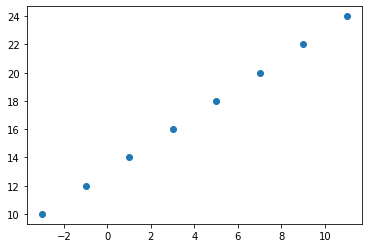

In [36]:
basic_computer = tf.constant(["mouse", "keyboard", "processor", "graphic card", "monitor"])
computer_price = tf.constant([8550])
basic_computer, computer_price

X = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0, 9.0, 11.0])

y = np.array([10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0])

plt.scatter(X, y)

input_shape = X[0].shape 

output_shape = y[0].shape

In [53]:
X = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0, 9.0, 11.0])

y = np.array([10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0])

X_train = X[:8]
y_train = y[:8]

X_test = X[0:]
y_test = y[0:]

In [54]:
tf.random.set_seed(13)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(X, y, epochs=5)

model.predict([16.0])

Epoch 1/5
1/1 [==============================] - 1s 586ms/step - loss: 15.6370 - mae: 15.6370
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 15.4670 - mae: 15.4670
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 15.2970 - mae: 15.2970
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 15.1270 - mae: 15.1270
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 14.9570 - mae: 14.9570


array([[8.702131]], dtype=float32)

In [55]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=13)

X.shape, y.shape

((1000, 2), (1000,))

In [56]:
tf.random.set_seed(13)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_1.fit(X, y, epochs=5)

model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.4784 - accuracy: 0.4910
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 3.9628 - accuracy: 0.4990
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 1.0001 - accuracy: 0.4980
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7223 - accuracy: 0.4960
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932075619697571, 0.5]

Epoch 1/100
1/1 [==============================] - 1s 618ms/step - loss: 21.5628 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 21.5425 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 21.5198 - accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 21.4943 - accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 21.4657 - accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 21.4337 - accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 21.3977 - accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 21.3574 - accuracy: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 21.3122 - accuracy: 0.0000e+00
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 21.2615 

<AxesSubplot:xlabel='epochs'>

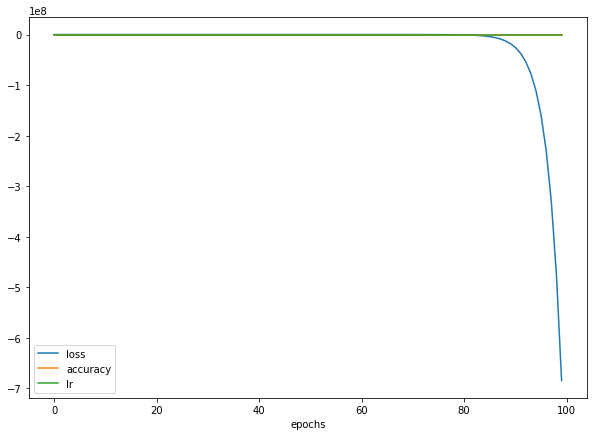

In [57]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"]) 

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_3.fit(X_train, 
                      y_train, 
                      epochs=100,
                      callbacks=[lr_scheduler])

pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs. loss')

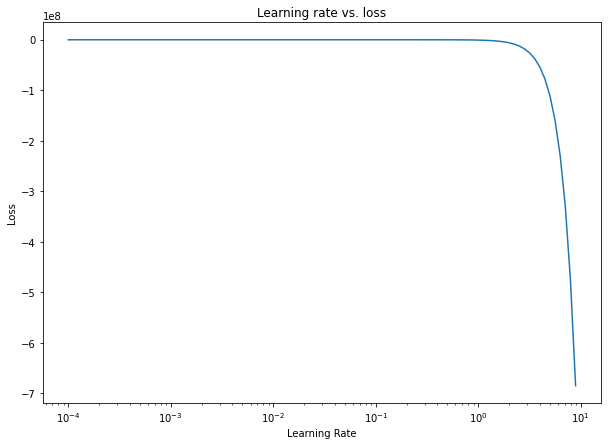

In [58]:
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")

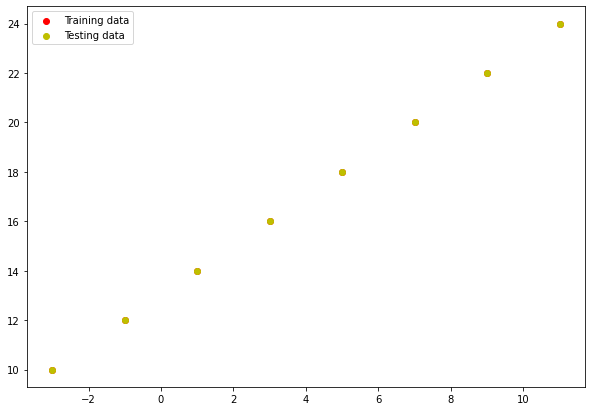

In [59]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c='r', label='Training data')
plt.scatter(X_test, y_test, c='y', label='Testing data')
plt.legend()

In [60]:
y_preds = model.predict(X_test)

In [65]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend()

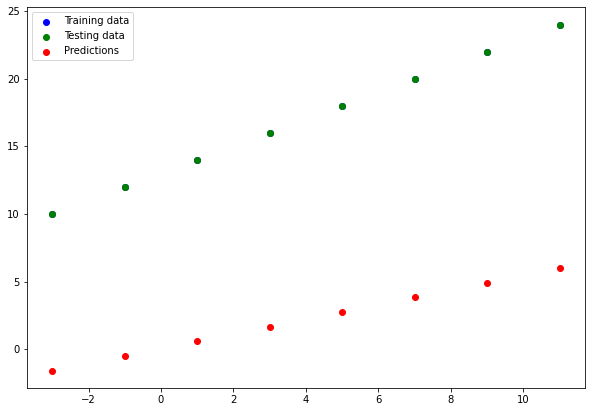

In [66]:
plot_predictions()